# Single Layer LSTM

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf

print(tf.__version__)

2.7.0


In [4]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

tokenizer = info.features['text'].encoder

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)

train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 382s 969ms/step - loss: 0.5755 - accuracy: 0.6923 - val_loss: 0.6869 - val_accuracy: 0.5087
Epoch 2/10
391/391 [==============================] - 354s 905ms/step - loss: 0.4693 - accuracy: 0.7856 - val_loss: 0.4894 - val_accuracy: 0.7898
Epoch 3/10
391/391 [==============================] - 353s 904ms/step - loss: 0.3544 - accuracy: 0.8558 - val_loss: 0.4045 - val_accuracy: 0.8380
Epoch 4/10
391/391 [==============================] - 352s 900ms/step - loss: 0.2669 - accuracy: 0.8981 - val_loss: 0.3900 - val_accuracy: 0.8409
Epoch 5/10
391/391 [==============================] - 347s 888ms/step - loss: 0.2243 - accuracy: 0.9156 - val_loss: 0.4238 - val_accuracy: 0.8345
Epoch 6/10
391/391 [==============================] - 345s 883ms/step - loss: 0.2667 - accuracy: 0.8984 - val_loss: 0.4761 - val_accuracy: 0.8095
Epoch 7/10
391/391 [==============================] - 345s 883ms/step - loss: 0.1710 - accuracy: 0.9386 - val_loss: 0.4863 -

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

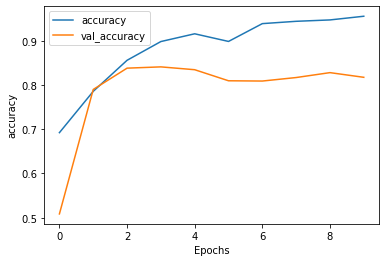

In [11]:
plot_graphs(history, 'accuracy')

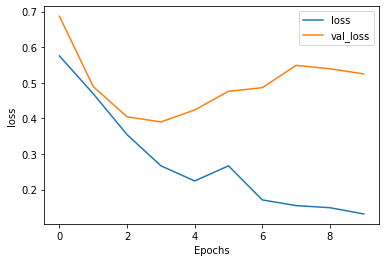

In [12]:
plot_graphs(history, 'loss')